In [1]:
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pickle
from PIL import Image
import os.path as osp
import sys
#sys.path.append('..')
#print os.listdir('.')
#print sys.path
#sys.path.append(osp.abspath('..'))
#import getOperators

import torch

from mlworkflow import FileManager
from code.total.getOperators import mapDict as Modules

from figures import extractPercentileStats
from figures import GetPlots, GetHists
from figures import mnistOmniglotDomainShift as mdShift

/fs/vulcan-scratch/krusinga/projects/template/mlworkflow/defaults.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/fs/vulcan-scratch/krusinga/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/fs/vulcan-scratch/krusinga/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/fs/vulcan-scratch/krusinga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/fs/vulcan-scratch/krusinga/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/fs/vulcan-scratch/krusi

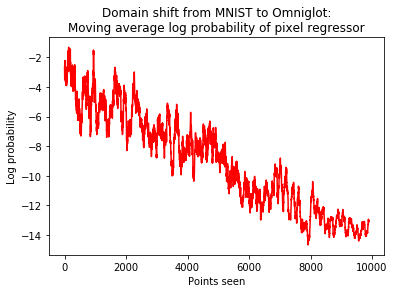

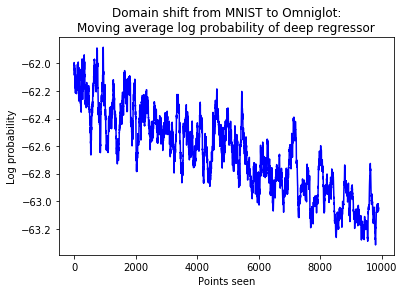

In [8]:
pixShift, deepShift = mdShift()
pixCum = np.cumsum(pixShift)
deepCum = np.cumsum(deepShift)
pixMov = (1.0/100)*(pixCum[100:]-pixCum[:-100])
deepMov = (1.0/100)*(deepCum[100:]-deepCum[:-100])
plt.figure(1)
plt.plot(pixMov, 'r-')
plt.title("Domain shift from MNIST to Omniglot:\nMoving average log probability of pixel regressor")
plt.xlabel("Points seen")
plt.ylabel("Log probability")
plt.savefig('./experiments/e70/analysis/mnistOmniglotDomainShift_pixel.png', dpi=500)
plt.figure(2)
plt.plot(deepMov, 'b-')
plt.title("Domain shift from MNIST to Omniglot:\nMoving average log probability of deep regressor")
plt.xlabel("Points seen")
plt.ylabel("Log probability")
plt.savefig('./experiments/e70/analysis/mnistOmniglotDomainShift_deep.png', dpi=500)

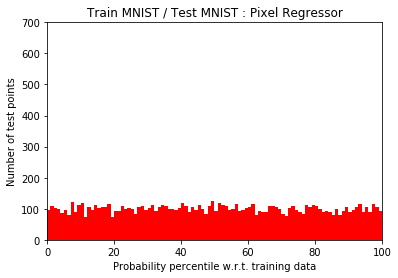

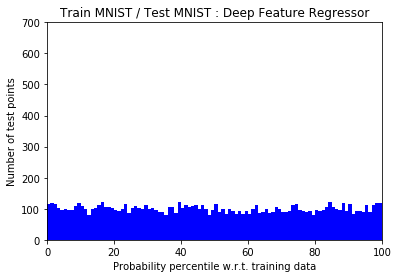

In [2]:
pixelPercentiles, deepPercentiles = GetHists('./generated/e68/data','','mnistNumerical','mnistNumerical','blip')
plt.figure(1)
plt.hist(pixelPercentiles, bins=100, color='r')
plt.ylim(ymax=700, ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test MNIST : Pixel Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/mnistTrainMnistTest_pixelHist.png', dpi=500)
plt.figure(2)
plt.hist(deepPercentiles,bins=100, color='b')
plt.ylim(ymax=700,ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test MNIST : Deep Feature Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/mnistTrainMnistTest_deepHist.png',dpi=500)

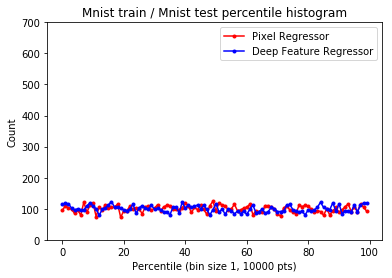

In [29]:
fig, ax = GetPlots('./generated/e68/data','','mnistNumerical','mnistNumerical','blip')
ax.set_title("Mnist train / Mnist test percentile histogram")
ax.set_xlabel("Percentile (bin size 1, 10000 pts)")
ax.set_ylabel("Count")
ax.set_ylim(ymax=700, ymin=0)
fig.savefig('./experiments/e68/analysis/mnistTrainMnistTest.png')

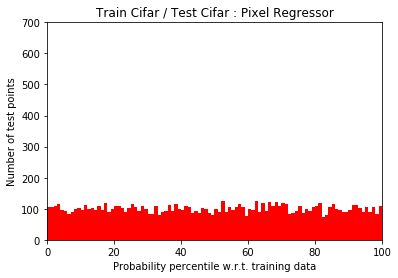

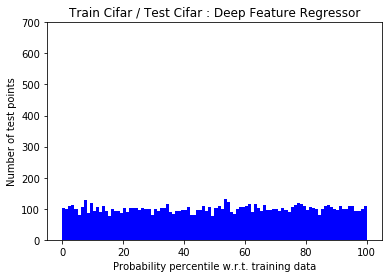

In [30]:
pixelPercentiles, deepPercentiles = GetHists('./generated/e68/data','','cifarNumerical','cifarNumerical','blip')
plt.figure(1)
plt.hist(pixelPercentiles, bins=100, color='r')
plt.ylim(ymax=700, ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train Cifar / Test Cifar : Pixel Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/cifarTrainCifarTest_pixelHist.png', dpi=500)
plt.figure(2)
plt.hist(deepPercentiles,bins=100, color='b')
plt.ylim(ymax=700,ymin=0)
plt.title("Train Cifar / Test Cifar : Deep Feature Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/cifarTrainCifarTest_deepHist.png', dpi=500)

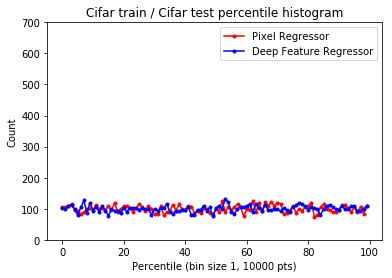

In [17]:
fig, ax = GetPlots('./generated/e68/data','','cifarNumerical','cifarNumerical','blip')
ax.set_title("Cifar train / Cifar test percentile histogram")
ax.set_xlabel("Percentile (bin size 1, 10000 pts)")
ax.set_ylabel("Count")
fig.savefig('./experiments/e68/analysis/cifarTrainCifarTest.png')

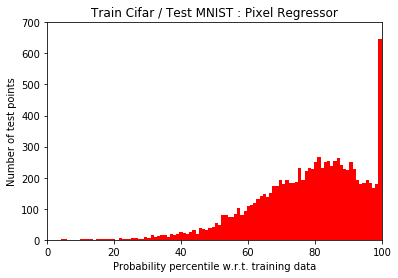

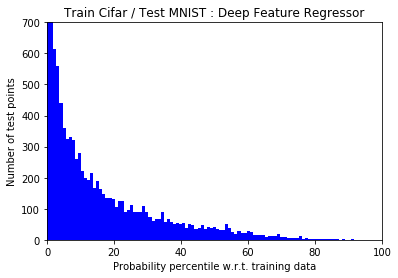

In [31]:
pixelPercentiles, deepPercentiles = GetHists('./generated/e68/data','','cifarNumerical','cifarNumericalOnMnist','blip')
plt.figure(1)
plt.hist(pixelPercentiles, bins=100, color='r')
plt.ylim(ymax=700, ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train Cifar / Test MNIST : Pixel Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/cifarTrainMnistTest_pixelHist.png', dpi=500)
plt.figure(2)
plt.hist(deepPercentiles,bins=100, color='b')
plt.ylim(ymax=700,ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train Cifar / Test MNIST : Deep Feature Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/cifarTrainMnistTest_deepHist.png', dpi=500)

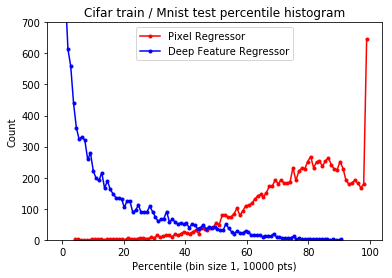

In [18]:
fig, ax = GetPlots('./generated/e68/data','','cifarNumerical','cifarNumericalOnMnist','blip')
ax.set_title("Cifar train / Mnist test percentile histogram")
ax.set_xlabel("Percentile (bin size 1, 10000 pts)")
ax.set_ylabel("Count")
fig.savefig('./experiments/e68/analysis/cifarTrainMnistTest.png')

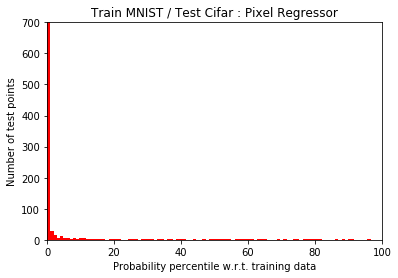

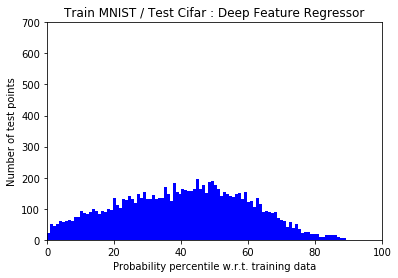

In [32]:
pixelPercentiles, deepPercentiles = GetHists('./generated/e68/data','','mnistNumerical','mnistNumericalOnCifar','blip')
plt.figure(1)
plt.hist(pixelPercentiles, bins=100, color='r')
plt.ylim(ymax=700, ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test Cifar : Pixel Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/mnistTrainCifarTest_pixelHist.png', dpi=500)
plt.figure(2)
plt.hist(deepPercentiles,bins=100, color='b')
plt.ylim(ymax=700,ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test Cifar : Deep Feature Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e68/analysis/mnistTrainCifarTest_deepHist.png', dpi=500)

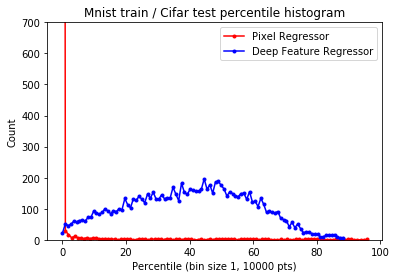

In [3]:
fig, ax = GetPlots('./generated/e68/data','','mnistNumerical','mnistNumericalOnCifar','blip')
ax.set_title("Mnist train / Cifar test percentile histogram")
ax.set_xlabel("Percentile (bin size 1, 10000 pts)")
ax.set_ylabel("Count")
fig.savefig('./experiments/e68/analysis/mnistTrainCifarTest.png')

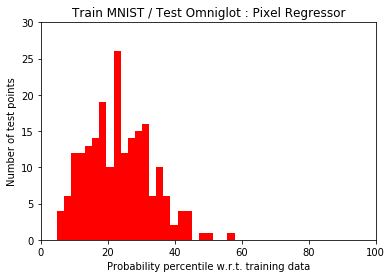

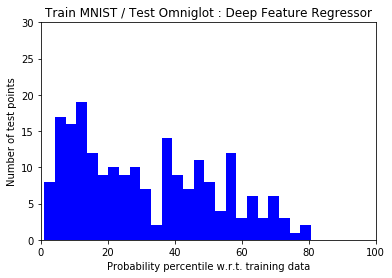

In [33]:
pixelPercentiles, deepPercentiles = GetHists('./generated/e69/data','','mnistNumerical','mnistNumericalOnOmniglot','blip')
plt.figure(1)
plt.hist(pixelPercentiles, bins=25, color='r')
plt.ylim(ymax=30, ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test Omniglot : Pixel Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e69/analysis/mnistTrainOmniglotTest_pixelHist.png', dpi=500)
plt.figure(2)
plt.hist(deepPercentiles,bins=25, color='b')
plt.ylim(ymax=30,ymin=0)
plt.xlim(xmax=100,xmin=0)
plt.title("Train MNIST / Test Omniglot : Deep Feature Regressor")
plt.xlabel("Probability percentile w.r.t. training data")
plt.ylabel("Number of test points")
plt.savefig('./experiments/e69/analysis/mnistTrainOmniglotTest_deepHist.png', dpi=500)

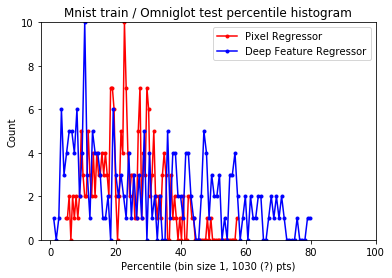

In [3]:
fig, ax = GetPlots('./generated/e69/data','','mnistNumerical','mnistNumericalOnOmniglot','blip')
ax.set_ylim(ymin=0, ymax=10)
ax.set_xlim(xmax=100)
ax.set_title("Mnist train / Omniglot test percentile histogram")
ax.set_xlabel("Percentile (bin size 1, 1030 (?) pts)")
ax.set_ylabel("Count")
fig.savefig('./experiments/e69/analysis/mnistTrainOmniglotTest.png')

In [3]:
probsPixel = pickle.load(open('./generated/e67/data/probsPixel.pickle','r')) 
probsDeep = pickle.load(open('./generated/e67/data/probsDeep.pickle','r')) 

In [5]:
print pixel.shape

(10000,)


(array([ 95., 109., 103.,  98.,  85.,  97.,  79., 121.,  89., 111., 119.,
         75., 106.,  95., 113., 103., 104., 105., 115.,  72.,  94.,  94.,
        108.,  98., 103.,  99.,  84., 106., 109.,  95., 102., 113.,  94.,
        106., 111., 110.,  99., 100.,  97., 103., 118., 109.,  88., 104.,
         97., 113.,  98.,  82., 110., 124.,  92., 120., 111., 110.,  95.,
        100., 114.,  93.,  96., 102., 105., 114.,  81.,  93.,  90.,  89.,
        110., 110., 104.,  99.,  82.,  77., 102., 110.,  96.,  88.,  84.,
        111., 107., 111., 108.,  98.,  89.,  94.,  91.,  79., 100.,  80.,
         93., 104.,  89.,  96., 107., 115.,  91., 105.,  91., 115., 105.,
         92.]),
 array([0.        , 0.00999983, 0.01999967, 0.0299995 , 0.03999933,
        0.04999917, 0.059999  , 0.06999883, 0.07999867, 0.0899985 ,
        0.09999833, 0.10999817, 0.119998  , 0.12999783, 0.13999767,
        0.1499975 , 0.15999733, 0.16999717, 0.179997  , 0.18999683,
        0.19999667, 0.2099965 , 0.21999633, 0.

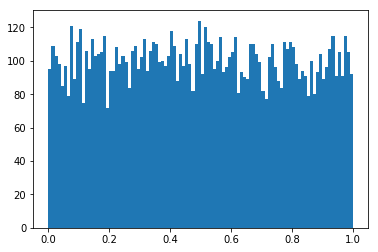

In [7]:
plt.hist(pixel, bins=100)

(array([114., 118., 116., 102.,  96., 100.,  97.,  96., 109., 119., 109.,
        100.,  79.,  98., 102., 112., 123., 105., 106., 102.,  97.,  94.,
         99., 115.,  85., 103., 110., 101.,  99., 111.,  98., 101.,  96.,
         90.,  91.,  80., 105., 105.,  87., 121., 102., 112., 104., 108.,
        112., 100., 111.,  98.,  80.,  97., 116.,  89.,  99.,  82., 100.,
         94.,  83.,  93.,  84.,  92.,  82.,  98., 112.,  87.,  90.,  99.,
         86.,  91., 105., 100.,  91.,  91.,  93., 111., 114.,  97.,  94.,
         90.,  92.,  80.,  97.,  92.,  96., 105., 121., 104., 100.,  97.,
        119.,  92., 116.,  84.,  94.,  92.,  91., 112.,  89., 113., 118.,
        118.]),
 array([1.66666667e-05, 1.00160000e-02, 2.00153333e-02, 3.00146667e-02,
        4.00140000e-02, 5.00133333e-02, 6.00126667e-02, 7.00120000e-02,
        8.00113333e-02, 9.00106667e-02, 1.00010000e-01, 1.10009333e-01,
        1.20008667e-01, 1.30008000e-01, 1.40007333e-01, 1.50006667e-01,
        1.60006000e-01, 1.7000

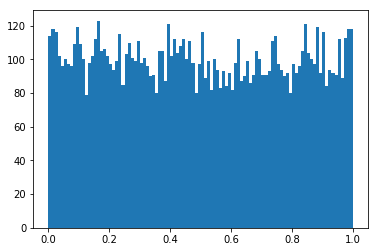

In [8]:
plt.hist(deep, bins=100)

In [5]:
from figures import cifar10numericalPlot

In [6]:
pixel, deep = cifar10numericalPlot()

(array([105., 104., 108., 114.,  96.,  92.,  82.,  89.,  98., 103.,  96.,
        111., 100., 101.,  97., 108.,  95., 119.,  91.,  99., 109., 109.,
        102.,  89., 102., 116., 106.,  92., 108., 100.,  82.,  82., 109.,
         79.,  88.,  94., 113.,  94., 114.,  98.,  97., 110., 107.,  86.,
         92.,  87., 101.,  98.,  86.,  80.,  98.,  91., 125.,  91., 104.,
         97., 104., 116., 105.,  76.,  99.,  96., 125.,  90., 118.,  92.,
        122., 110., 121., 109., 119., 116.,  82.,  87.,  93., 110.,  87.,
         99.,  92., 107., 108., 120.,  74.,  79., 106., 114., 100.,  95.,
         90.,  90.,  97., 112., 111., 101.,  91., 104.,  88., 107.,  84.,
        110.]), array([2.000000e-05, 1.001980e-02, 2.001960e-02, 3.001940e-02,
        4.001920e-02, 5.001900e-02, 6.001880e-02, 7.001860e-02,
        8.001840e-02, 9.001820e-02, 1.000180e-01, 1.100178e-01,
        1.200176e-01, 1.300174e-01, 1.400172e-01, 1.500170e-01,
        1.600168e-01, 1.700166e-01, 1.800164e-01, 1.900162e-01,

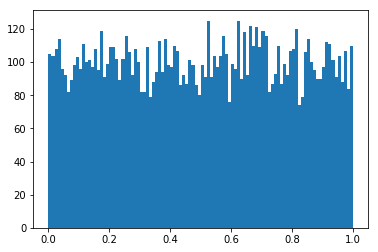

In [7]:
plt.hist(pixel,bins=100)

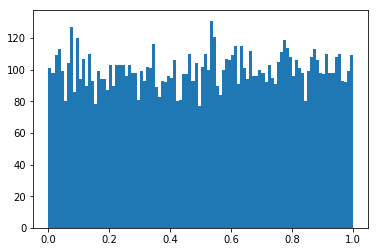

In [9]:
pltData = plt.hist(deep,bins=100)

In [10]:
pltData

(array([101.,  98., 109., 113.,  99.,  80., 104., 127.,  86., 120.,  94.,
        107.,  90., 110.,  93.,  78.,  99.,  94.,  94.,  87., 103.,  90.,
        103., 103., 103.,  96., 103.,  98.,  98.,  81.,  99.,  93., 102.,
        101., 116.,  89.,  83.,  93.,  92.,  96.,  95., 106.,  80.,  81.,
         97.,  97., 110.,  93., 104.,  77., 102., 110., 100., 131., 121.,
         90.,  84., 100., 107., 106., 109., 115.,  91., 115., 101.,  94.,
        112.,  96.,  96., 100.,  98.,  92., 103.,  95.,  91., 105., 111.,
        119., 114., 108.,  96., 106., 101.,  98.,  80.,  99., 108., 113.,
        106.,  98.,  97., 110.,  98.,  98., 108., 110.,  93.,  92.,  99.,
        109.]), array([8.000000e-05, 1.007680e-02, 2.007360e-02, 3.007040e-02,
        4.006720e-02, 5.006400e-02, 6.006080e-02, 7.005760e-02,
        8.005440e-02, 9.005120e-02, 1.000480e-01, 1.100448e-01,
        1.200416e-01, 1.300384e-01, 1.400352e-01, 1.500320e-01,
        1.600288e-01, 1.700256e-01, 1.800224e-01, 1.900192e-01,

In [11]:
type(pltData)

tuple

In [12]:
counts = pltData[0]
bins = pltData[1]

In [13]:
print len(counts)
print len(bins)

100
101


(0, 133.7)

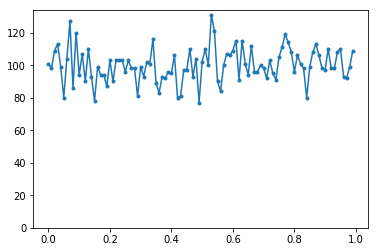

In [19]:
fig, ax = plt.subplots(1)
ax.plot(bins[:len(counts)],counts,'.-')
ax.set_ylim(ymin=0)

In [21]:
randTrain, randTest = np.random.rand(60000), np.random.rand(10000)

In [22]:
len(randTrain)

60000

In [23]:
from figures import extractPercentileStats

In [24]:
randPercentiles = extractPercentileStats(randTrain, randTest)

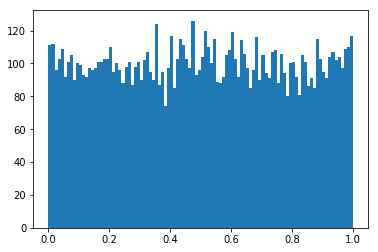

In [27]:
randCounts, randBins, _ = plt.hist(randPercentiles,bins=100)

(0, 128.6)

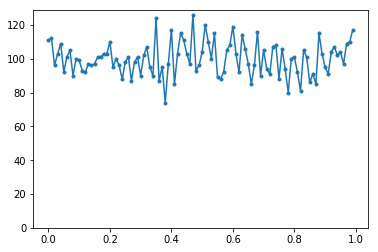

In [29]:
fig, ax = plt.subplots(1)
ax.plot(randBins[:len(randCounts)],randCounts,'.-')
ax.set_ylim(ymin=0)